# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car reconizing the car in front.

## Get the data

The images we are working with are frrom the Food101 dataset (101 different classes of food).

However we have modified it to only use two classes (pizza and steak).

**Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [75]:
'''
import zipfile

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()
'''

"\nimport zipfile\n\n# Unzip the downloaded file\nzip_ref = zipfile.ZipFile('pizza_steak.zip')\nzip_ref.extractall()\nzip_ref.close()\n"

## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [76]:
!dir pizza_steak

 El volumen de la unidad C no tiene etiqueta.
 El n�mero de serie del volumen es: E804-15D3

 Directorio de c:\Users\Usuario\Documents\ML_Projects\TensorFlow\Computer_Vision\pizza_steak

10/06/2025  20:56    <DIR>          .
28/06/2025  18:57    <DIR>          ..
07/06/2025  13:44    <DIR>          test
07/06/2025  13:44    <DIR>          train
               0 archivos              0 bytes
               4 dirs  719.208.906.752 bytes libres


In [77]:
!dir pizza_steak\train\

 El volumen de la unidad C no tiene etiqueta.
 El n�mero de serie del volumen es: E804-15D3

 Directorio de c:\Users\Usuario\Documents\ML_Projects\TensorFlow\Computer_Vision\pizza_steak\train

07/06/2025  13:44    <DIR>          .
10/06/2025  20:56    <DIR>          ..
07/06/2025  13:44    <DIR>          pizza
07/06/2025  13:44    <DIR>          steak
               0 archivos              0 bytes
               4 dirs  719.208.906.752 bytes libres


In [78]:
!dir pizza_steak\train\pizza

 El volumen de la unidad C no tiene etiqueta.
 El n�mero de serie del volumen es: E804-15D3

 Directorio de c:\Users\Usuario\Documents\ML_Projects\TensorFlow\Computer_Vision\pizza_steak\train\pizza

07/06/2025  13:44    <DIR>          .
07/06/2025  13:44    <DIR>          ..
07/06/2025  13:44            45.555 1008104.jpg
07/06/2025  13:44            55.042 1008144.jpg
07/06/2025  13:44            48.090 1008844.jpg
07/06/2025  13:44            44.492 1008941.jpg
07/06/2025  13:44           118.923 1011404.jpg
07/06/2025  13:44            52.687 102037.jpg
07/06/2025  13:44            47.401 1026922.jpg
07/06/2025  13:44            76.126 1029698.jpg
07/06/2025  13:44            57.669 1033251.jpg
07/06/2025  13:44            64.285 1035854.jpg
07/06/2025  13:44            35.744 1038357.jpg
07/06/2025  13:44            51.637 1040878.jpg
07/06/2025  13:44            48.281 1044524.jpg
07/06/2025  13:44            64.412 1044789.jpg
07/06/2025  13:44            41.408 1047561.jpg
07/06

In [79]:
import os

# Walk trhough pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 2 directories and 0 images in pizza_steak.
There are 2 directories and 0 images in pizza_steak\test.
There are 0 directories and 250 images in pizza_steak\test\pizza.
There are 0 directories and 250 images in pizza_steak\test\steak.
There are 2 directories and 0 images in pizza_steak\train.
There are 0 directories and 750 images in pizza_steak\train\pizza.
There are 0 directories and 750 images in pizza_steak\train\steak.


In [80]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [81]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')

# Create a list of class_names from the subdirectories
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [82]:
# Let's visualize our image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir+target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off');

    print(f'Image shape: {img.shape}') # show the shape of the image

    return img

['483788.jpg']
Image shape: (384, 512, 3)


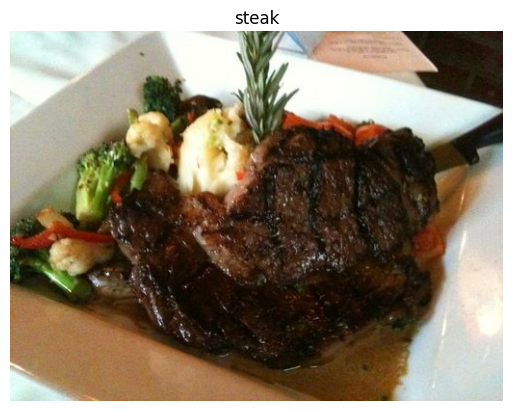

In [83]:
# View a random image from the training datset
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='steak')

['1743389.jpg']
Image shape: (512, 512, 3)


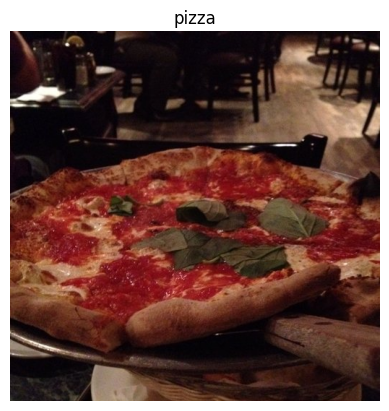

In [84]:
# View a random image from the training datset
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='pizza')

In [85]:
# The images we have imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[25,  2,  8],
        [32,  7, 11],
        [42, 16, 19],
        ...,
        [21, 12, 15],
        [19, 10, 13],
        [15,  6,  9]],

       [[25,  2,  8],
        [26,  3,  9],
        [33,  7, 10],
        ...,
        [20, 11, 14],
        [20, 11, 14],
        [17,  8, 11]],

       [[27,  6, 13],
        [27,  4, 10],
        [30,  3,  8],
        ...,
        [20, 11, 16],
        [21, 12, 17],
        [20, 11, 16]],

       ...,

       [[60, 59, 54],
        [58, 57, 52],
        [44, 43, 38],
        ...,
        [11,  6, 13],
        [12,  5, 13],
        [13,  6, 14]],

       [[57, 57, 49],
        [60, 60, 52],
        [48, 48, 40],
        ...,
        [11,  6, 13],
        [12,  7, 14],
        [12,  7, 14]],

       [[45, 45, 37],
        [54, 54, 46],
        [49, 49, 41],
        ...,
        [11,  6, 13],
        [12,  7, 14],
        [13,  8, 15]]], dtype=uint8)>

In [86]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 512, 3)

In [87]:
# Get all the pixel values between 0 and 1
img/255.

array([[[0.09803922, 0.00784314, 0.03137255],
        [0.1254902 , 0.02745098, 0.04313725],
        [0.16470588, 0.0627451 , 0.0745098 ],
        ...,
        [0.08235294, 0.04705882, 0.05882353],
        [0.0745098 , 0.03921569, 0.05098039],
        [0.05882353, 0.02352941, 0.03529412]],

       [[0.09803922, 0.00784314, 0.03137255],
        [0.10196078, 0.01176471, 0.03529412],
        [0.12941176, 0.02745098, 0.03921569],
        ...,
        [0.07843137, 0.04313725, 0.05490196],
        [0.07843137, 0.04313725, 0.05490196],
        [0.06666667, 0.03137255, 0.04313725]],

       [[0.10588235, 0.02352941, 0.05098039],
        [0.10588235, 0.01568627, 0.03921569],
        [0.11764706, 0.01176471, 0.03137255],
        ...,
        [0.07843137, 0.04313725, 0.0627451 ],
        [0.08235294, 0.04705882, 0.06666667],
        [0.07843137, 0.04313725, 0.0627451 ]],

       ...,

       [[0.23529412, 0.23137255, 0.21176471],
        [0.22745098, 0.22352941, 0.20392157],
        [0.17254902, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [88]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set up to our data directories
train_dir = "C:/Users/Usuario/Documents/ML_Projects/TensorFlow/Computer_Vision/pizza_steak/train"
test_dir = "C:/Users/Usuario/Documents/ML_Projects/TensorFlow/Computer_Vision/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile our CNN
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 5s 88ms/step - loss: 0.6581 - accuracy: 0.6013 - val_loss: 0.5036 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 4s 78ms/step - loss: 0.4822 - accuracy: 0.7820 - val_loss: 0.3862 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 3s 74ms/step - loss: 0.4371 - accuracy: 0.8033 - val_loss: 0.3543 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 3s 69ms/step - loss: 0.3901 - accuracy: 0.8347 - val_loss: 0.3414 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 3s 70ms/step - loss: 0.3568 - accuracy: 0.8513 - val_loss: 0.3311 - val_accuracy: 0.8620


In [89]:
# Get a model summary
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

## Using the same model as before

Let's replicate the model we have built in a previous section to see if it works with our image data.

In [90]:
train_data

In [91]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 4s 74ms/step - loss: 0.7143 - accuracy: 0.4720 - val_loss: 0.6939 - val_accuracy: 0.4860
Epoch 2/5
47/47 [==============================] - 3s 71ms/step - loss: 0.6931 - accuracy: 0.4993 - val_loss: 0.6934 - val_accuracy: 0.4920
Epoch 3/5
47/47 [==============================] - 3s 72ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.4920
Epoch 4/5
47/47 [==============================] - 3s 68ms/step - loss: 0.6930 - accuracy: 0.5013 - val_loss: 0.6935 - val_accuracy: 0.4940
Epoch 5/5
47/47 [==============================] - 3s 69ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.4940


In [92]:
# Get a summary of our model
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 150528)            0         
                                                                 
 dense_13 (Dense)            (None, 4)                 602116    
                                                                 
 dense_14 (Dense)            (None, 4)                 20        
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1) model_2 performs terribly...

In [93]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 4s 76ms/step - loss: 3.4297 - accuracy: 0.6100 - val_loss: 0.8045 - val_accuracy: 0.7320
Epoch 2/5
47/47 [==============================] - 3s 72ms/step - loss: 1.1777 - accuracy: 0.6753 - val_loss: 0.5438 - val_accuracy: 0.7800
Epoch 3/5
47/47 [==============================] - 3s 71ms/step - loss: 0.6608 - accuracy: 0.7320 - val_loss: 0.9586 - val_accuracy: 0.5800
Epoch 4/5
47/47 [==============================] - 3s 68ms/step - loss: 0.6541 - accuracy: 0.7247 - val_loss: 0.5783 - val_accuracy: 0.7020
Epoch 5/5
47/47 [==============================] - 3s 69ms/step - loss: 0.4719 - accuracy: 0.7933 - val_loss: 0.5123 - val_accuracy: 0.7520


In [94]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 150528)            0         
                                                                 
 dense_16 (Dense)            (None, 100)               15052900  
                                                                 
 dense_17 (Dense)            (None, 100)               10100     
                                                                 
 dense_18 (Dense)            (None, 100)               10100     
                                                                 
 dense_19 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


**Note:** You can think of trainable parameters as **patterns a model can learn from data.** Intuitively, you might think more is better. And in lots of cases, it is. But, in this case, the difference here is the two different styles of model we are using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image.** So even though these are less learnable parameters in our convolutinoal neural network, these are often more helpful in dechiphering between different **features** in an image.

In [95]:
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [96]:
15073.201/31.101

484.65325873766113

## Binary Classification: Let's breaking down

1. Become one with the data.
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied

### 1. Become one with teh data

In [97]:
# Let's visualize our image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir+target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off');

    print(f'Image shape: {img.shape}') # show the shape of the image

    return img

['127029.jpg']
Image shape: (436, 512, 3)
['682201.jpg']
Image shape: (512, 512, 3)


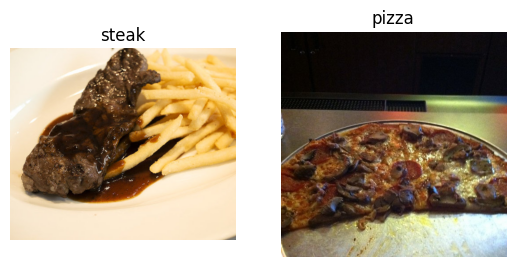

In [98]:
# Visualize data
import matplotlib.pyplot as plt
import os

plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

### 2. Preprocess the data (prepare it for model)

In [99]:
# Define directory dataset paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10.000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10.000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10.000 images in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for yout health...

In [100]:
# Create train and etst data generators and rescale the data
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [101]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # target directory of images
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode='binary', # type of data you're working with
                                               batch_size=32) # size of minibatches to load data into
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [102]:
# Get a sample of a train data bacth
images, labels = train_data.next() # get the 'next' batch of images/lavels in train data
len(images), len(labels)

(32, 32)

In [103]:
# How many batches are there?
len(train_data)

47

In [104]:
1500/32

46.875

In [105]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [106]:
images[7].shape

(224, 224, 3)

In [107]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relativdly simple model or existing result that you steup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

**Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get starteed is to start with something simple and see if it works on your data and the introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [108]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam # type: ignore
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation #type: ignore
from tensorflow.keras import Sequential # type: ignore

In [109]:
# Create the model
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=(3, 3), # the size of the sliding window going across an input
           strides=1, # the size of the step the sliding window takes across an input
           padding='valid', # if 'same', output shape is same as input shape, if 'valid', output shape gets compressed
           activation='relu',
           input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid') # output layer (working with binary classification)
])

In [110]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [111]:
# Get a summary of our model
model_4.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_22 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_10 (Flatten)        (None, 475240)            0         
                                                                 
 dense_20 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [112]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [113]:
# Fit the model
history_4 = model_4.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 4s 73ms/step - loss: 1.4043 - accuracy: 0.6613 - val_loss: 0.4702 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 3s 72ms/step - loss: 0.4662 - accuracy: 0.7880 - val_loss: 0.4029 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 3s 72ms/step - loss: 0.3079 - accuracy: 0.8820 - val_loss: 0.4377 - val_accuracy: 0.7900
Epoch 4/5
47/47 [==============================] - 3s 69ms/step - loss: 0.1492 - accuracy: 0.9600 - val_loss: 0.5077 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 3s 70ms/step - loss: 0.0590 - accuracy: 0.9840 - val_loss: 0.4843 - val_accuracy: 0.8180


### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.

<Axes: >

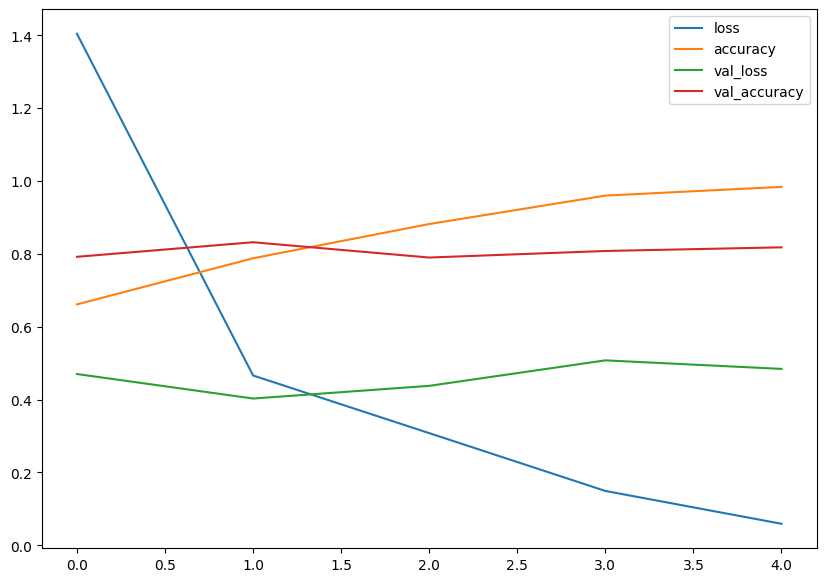

In [114]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [115]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_loss')
    plt.plot(epochs, val_accuracy, label='val_loss')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()

**Note:** When a model's **validation loss strats to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

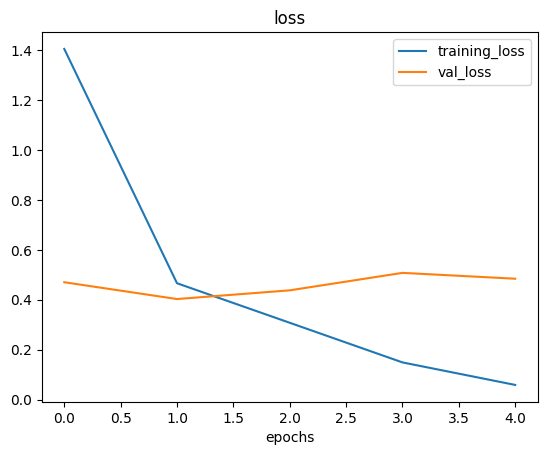

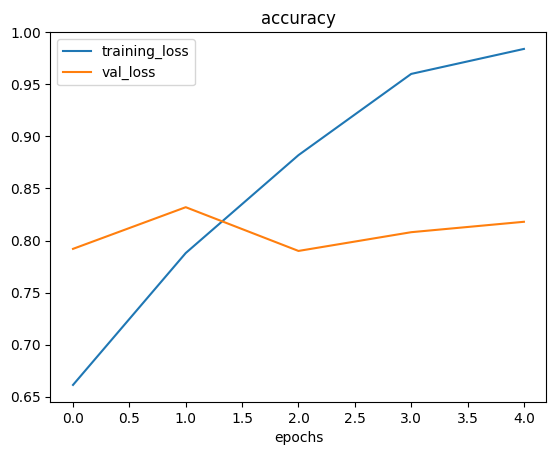

In [116]:
# Vheck out the loss and accuracy of model_4
plot_loss_curves(history_4)

**Note:** Ideally the two loss curves (training and validation) will be very similar to each other (decreasing at similar rates), when there are large differences your model may be **overfitting**.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

**Note:** Reducing overfitting is also known as *regularization*.

In [117]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(3),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [118]:
# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [119]:
# Fit the model
history_5 = model_5.fit(train_data,
            epochs=5,
            steps_per_epoch = len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 4s 73ms/step - loss: 0.5935 - accuracy: 0.6880 - val_loss: 0.4976 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 3s 71ms/step - loss: 0.4604 - accuracy: 0.7880 - val_loss: 0.3738 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 3s 71ms/step - loss: 0.4313 - accuracy: 0.8133 - val_loss: 0.3608 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 3s 69ms/step - loss: 0.4099 - accuracy: 0.8187 - val_loss: 0.3728 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 3s 69ms/step - loss: 0.3961 - accuracy: 0.8247 - val_loss: 0.3251 - val_accuracy: 0.8580


In [120]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 17, 17, 10)     

In [121]:
model_4.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_22 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_10 (Flatten)        (None, 475240)            0         
                                                                 
 dense_20 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


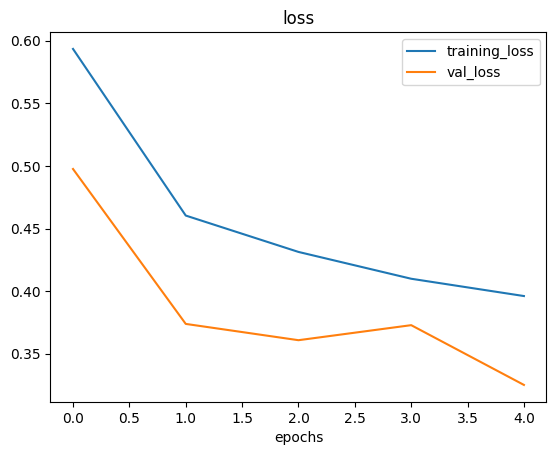

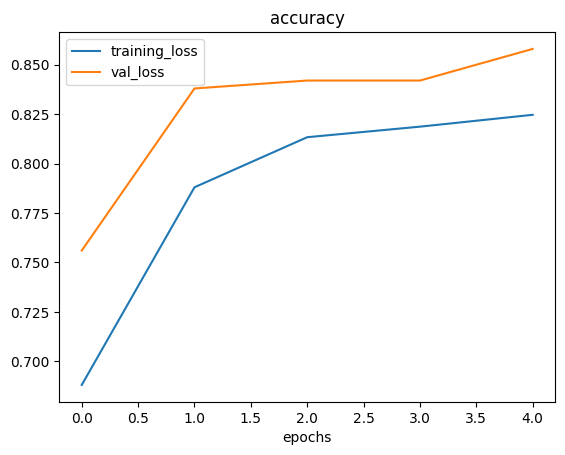

In [122]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [123]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image
                                             shear_range=0.2, # how much do you want to shear an image
                                             zoom_range=0.2, # zoom in randomly on an image
                                             width_shift_range=0.2, # move your image around on the x-axis
                                             height_shift_range=0.2, # move your image around on the y-axis
                                             horizontal_flip=True) # do yoyu want to flip and image

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentatio for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

**Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjustin the rotation of an image, flipping it, cropping it or something similar.

let's write some code to visualize data augmentation...

In [124]:
# Import data aund augment it from training directory
print('Augmented training data:')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size=(224,224),
                                                                      batch_size=32,
                                                                      class_mode='binary',
                                                                      shuffle=False) # for demonstration purposes only

# Create non-augmented train data batches
print('Non-augmented training data:')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                            #    class_mode='binary',
                                               shuffle=False)

# Create non-augmented test data batches
print('Non-augmented test data:')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data.

In [125]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented... only data (images)

Showing image number: 25


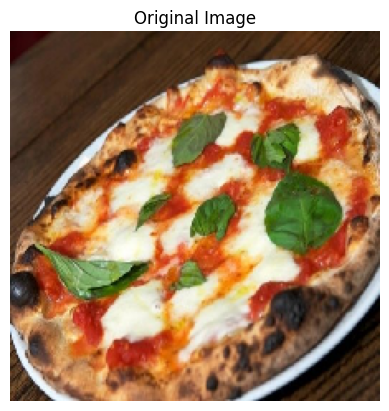

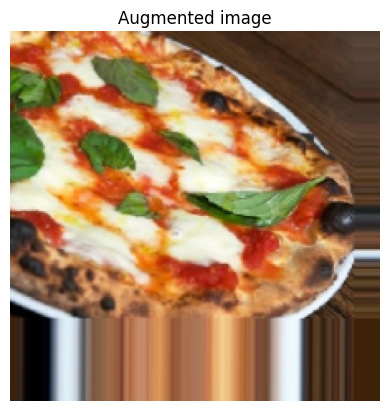

In [126]:
# Show the original image and augmented image
import random
random_number = random.randint(0, 32) # our batch size is 32
print(f'Showing image number: {random_number}')
plt.imshow(images[random_number])
plt.title(f'Original Image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f'Augmented image')
plt.axis(False);

Now we have seen what augmented training data looks like, let's build a model and see how it learns on augmented data.

In [127]:
# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 229ms/step - loss: 0.7350 - accuracy: 0.4800 - val_loss: 0.6933 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 10s 219ms/step - loss: 0.6923 - accuracy: 0.5440 - val_loss: 0.6893 - val_accuracy: 0.5840
Epoch 3/5
47/47 [==============================] - 10s 218ms/step - loss: 0.6863 - accuracy: 0.5653 - val_loss: 0.6683 - val_accuracy: 0.6260
Epoch 4/5
47/47 [==============================] - 10s 219ms/step - loss: 0.6852 - accuracy: 0.5300 - val_loss: 0.6783 - val_accuracy: 0.6080
Epoch 5/5
47/47 [==============================] - 10s 219ms/step - loss: 0.6865 - accuracy: 0.5647 - val_loss: 0.6611 - val_accuracy: 0.5280


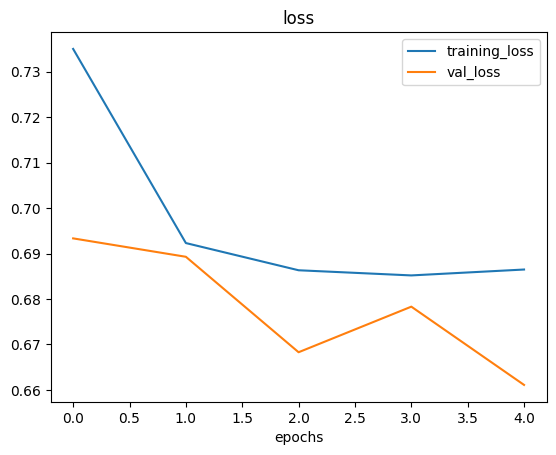

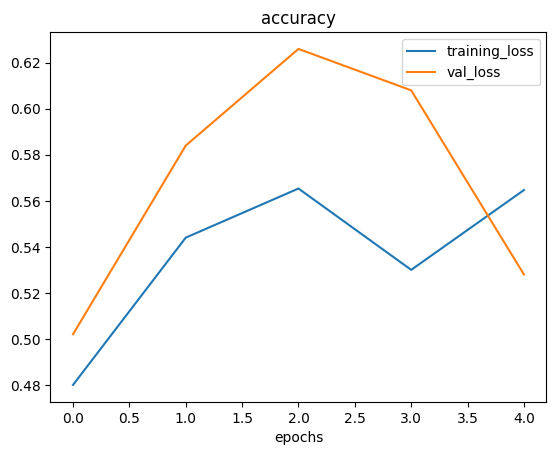

In [128]:
# Check our models training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens.

In [129]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224,224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [130]:
# Create the model (same as model_5 and model_6)
model_7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 229ms/step - loss: 0.6436 - accuracy: 0.6293 - val_loss: 0.4906 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 11s 223ms/step - loss: 0.5764 - accuracy: 0.6980 - val_loss: 0.4098 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 10s 222ms/step - loss: 0.5301 - accuracy: 0.7420 - val_loss: 0.4627 - val_accuracy: 0.7580
Epoch 4/5
47/47 [==============================] - 10s 222ms/step - loss: 0.4863 - accuracy: 0.7707 - val_loss: 0.3773 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 10s 220ms/step - loss: 0.4641 - accuracy: 0.7913 - val_loss: 0.4311 - val_accuracy: 0.7920


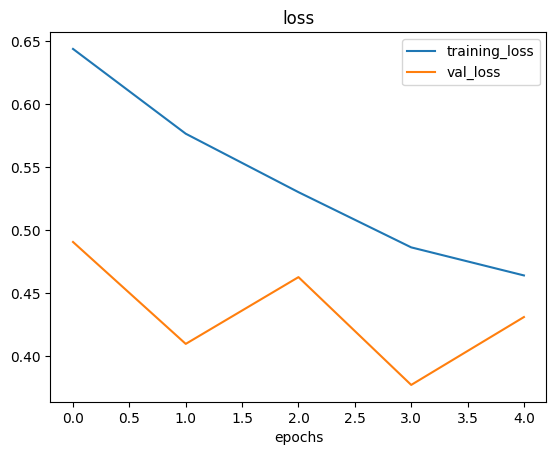

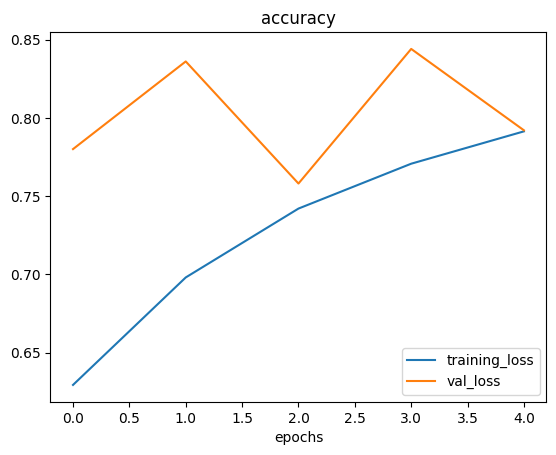

In [131]:
# Plot loss curves
plot_loss_curves(history_7)

**Note:** When shuffling trianing data, the model gets exposed to all different kinds of data during training, thus enableing it to learn features across a wide array of images (in our case, pizza and steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied

Since we have already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layyers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learnt and adjust it for our own use case

## Making a prediction with our trained model on our own custom data

In [132]:
# Classes we are working with
print(class_names)

['pizza' 'steak']


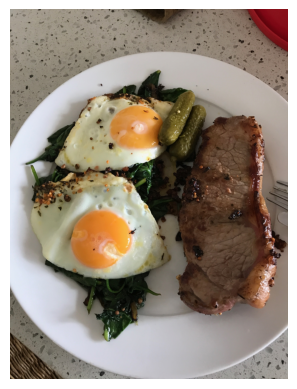

In [133]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import urllib.request

# Descargar la imagen
url = "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg"
filename = "03-steak.jpeg"
urllib.request.urlretrieve(url, filename)

# Cargar la imagen
steak = mpimg.imread(filename)
plt.imshow(steak)
plt.axis(False);

In [134]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

**Note:** When you train a neural network and you want to make a prediction with it on yout own custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [135]:
# Create a function to import and image and resize it to be able to be used by our model
def load_and_prep_image(filename, img_shape=224):
    '''
    Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channels).
    '''
    # Read in the image
    img = tf.io.read_file(filename)
    # Decode the read file into a tensor
    img = tf.image.decode_image(img)
    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # Rescale the image (get all values between 0 and 1)
    img = img/255.
    return img

In [136]:
# Load in and preprocess our custom image
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [137]:
expanded_steak = tf.expand_dims(steak, axis=0)

In [138]:
pred = model_7.predict(expanded_steak)
pred

1/1 [==============================] - 0s 47ms/step


array([[0.94499093]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as as the model's prediction?

In [139]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [140]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [141]:
def pred_and_plot(model, filename, class_model=class_names):
    '''
    Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title.
    '''
    # Import the target image and preprocess it
    img = load_and_prep_image(filename=filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class
    pred_class = class_names[int(tf.round(pred))]

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f'Prediction: {pred_class}')
    plt.axis(False);

1/1 [==============================] - 0s 14ms/step


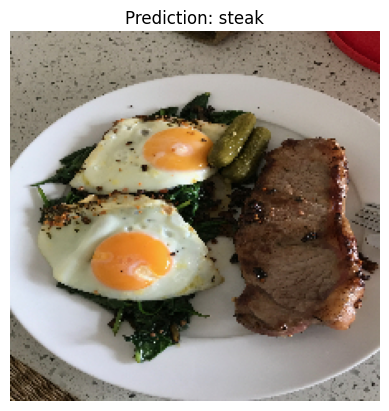

In [142]:
# Test our model on a custom image
pred_and_plot(model_7, '03-steak.jpeg')

# Multi-class Image Classification

We have just been trhough a bunch of the following steps with  binary classification problem (pizza vs. steak), now we are going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and imporve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with the data

In [ ]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filnames in os.walk('10_food_classes_all_data'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')